In [45]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)
from scipy.integrate import odeint
from deepymod_torch.library_function import *
from deepymod_torch.DeepMod import DeepMoD
from deepymod_torch.neural_net import *
from deepymod_torch.sparsity import *

torch.set_default_tensor_type('torch.cuda.FloatTensor')

np.random.seed(40)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creating data

In [47]:
data = loadmat('Decay_single.mat')

In [50]:
usol = np.real(data['Expression1'])
usol.shape

(7488, 1)

In [52]:
usol= usol.reshape((2496,3))

In [53]:
t_v = np.float32(np.expand_dims(usol[:,0],axis=1))
y_stress = np.float32(np.expand_dims(usol[:,2],axis=1))
y_strain = np.float32(np.expand_dims(usol[:,1],axis=1))

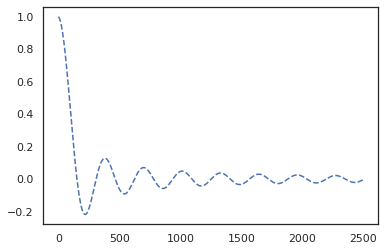

In [54]:
plt.plot(y_stress,'--')

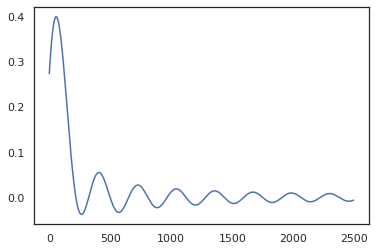

In [55]:
plt.plot(y_strain)

# DeepMoD

In [56]:
np.random.seed(42)  # setting seed for randomisation
noise_level = 0.0

In [60]:
number_of_samples = 2000

idx = np.random.permutation(y_strain.size)
X_train = torch.tensor(t_v[idx, :][:number_of_samples], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y_strain[idx, :][:number_of_samples], dtype=torch.float32)


In [61]:
X_train.shape

torch.Size([2000, 1])

In [62]:
y_train.shape

torch.Size([2000, 1])

In [63]:
optim_config = {'lambda': 10**-5, 'max_iterations': 10001}

In [71]:
network_config = {'input_dim': 1, 'hidden_dim': 20, 'layers': 4, 'output_dim': y_train.shape[1]}

In [72]:
library_config = {'type': mech_library_group}

In [73]:
network, coeff_vector_list, sparsity_mask_list = deepmod_init(network_config, library_config)

1


In [67]:
train_group_mse(X_train, y_train, network, coeff_vector_list, sparsity_mask_list, library_config, optim_config)

Epoch | Total loss | MSE | PI | L1 
0 4.1E-02 4.1E-02
5000 1.4E-04 1.4E-04


KeyboardInterrupt: 

In [68]:
time_deriv_list, theta, coeff_vector_list = train_group(X_train, y_train, network, coeff_vector_list, sparsity_mask_list, library_config, optim_config) 

Epoch | Total loss | MSE | PI | L1 
0 4.7E-02 1.0E-04 4.7E-02 1.3E-04 1.3E-04
tensor([[-0.2135],
        [-1.9850],
        [-2.1551],
        [ 0.2650],
        [ 0.8803],
        [ 0.6602],
        [ 0.0059]], requires_grad=True)
5000 3.1E-04 1.6E-04 4.2E-05 5.0E-05 5.0E-05
tensor([[-0.2782],
        [-0.3209],
        [-0.4470],
        [-0.4541],
        [ 0.4152],
        [ 0.9049],
        [-0.0866]], requires_grad=True)
10000 1.6E-04 1.1E-04 6.4E-06 2.1E-05 2.1E-05
tensor([[-2.5869e-05],
        [-8.3591e-05],
        [-2.7183e-02],
        [ 4.6729e-03],
        [ 2.7787e-01],
        [ 6.5718e-01],
        [ 8.8362e-01]], requires_grad=True)


In [69]:
X_all = torch.tensor(t_v, dtype=torch.float32, requires_grad=True) 
prediction_full = network(X_all).cpu()

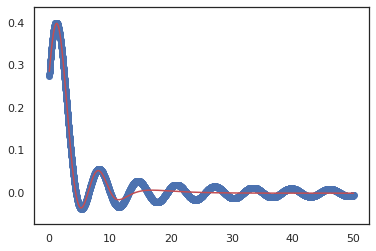

In [70]:
plt.scatter(t_v, y_strain)
plt.plot(t_v,prediction_full.detach().numpy(),'r')

In [42]:
scaled_coeff_vector_list = [scaling(coeff_vector, theta, time_deriv) for coeff_vector, theta , time_deriv in zip(coeff_vector_list, theta, time_deriv_list)]

In [43]:
scaled_coeff_vector_list

[tensor([[-0.2836],
         [ 1.1197],
         [-0.2405],
         [-0.0048],
         [-0.3962],
         [-0.3008],
         [-0.1726]], grad_fn=<MulBackward0>)]

In [137]:
scaled_coeff_vector_list

[tensor([[ 0.4845],
         [ 1.1418],
         [-0.4059],
         [-0.0073],
         [ 0.3012],
         [-0.5050],
         [-0.1206]], grad_fn=<MulBackward0>)]